In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.husl_palette(s=1)
sns.set(style='whitegrid', palette=palette, context='talk')

### Load data

In [2]:
df = pd.read_csv('train.csv', parse_dates=True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Train-test-split

In [34]:
X = df
y = df['count']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 12), (2178, 12), (8708,), (2178,))

### Exploratory data analysis

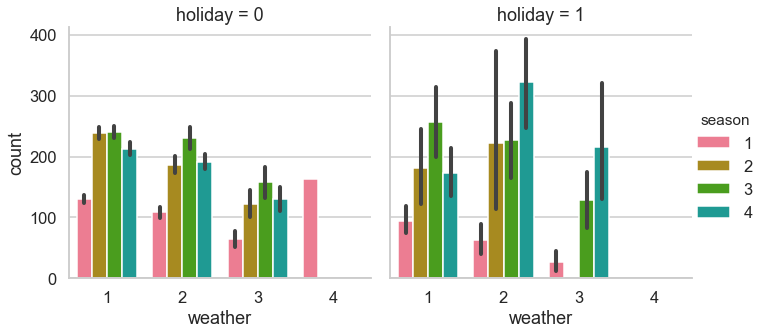

In [5]:
g = sns.catplot(x='weather', y='count', kind='bar', hue = 'season', col = 'holiday', data=X_train)

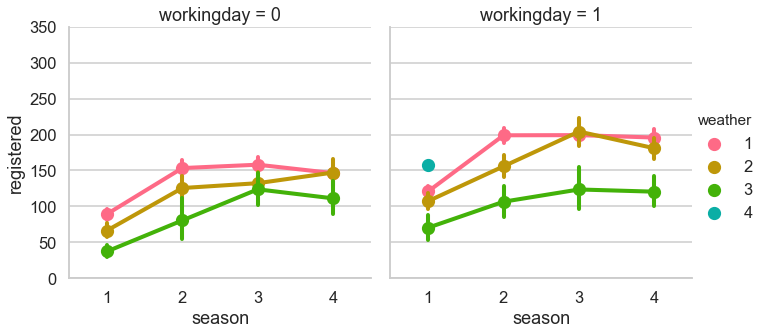

In [6]:
# Registered users
g = sns.catplot(x='season', y='registered', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

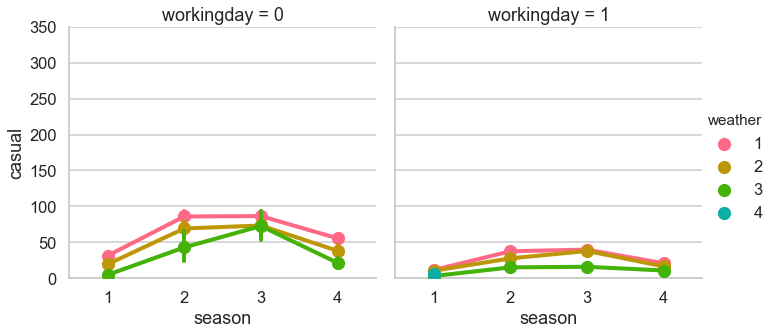

In [7]:
# Casual users
g = sns.catplot(x='season', y='casual', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

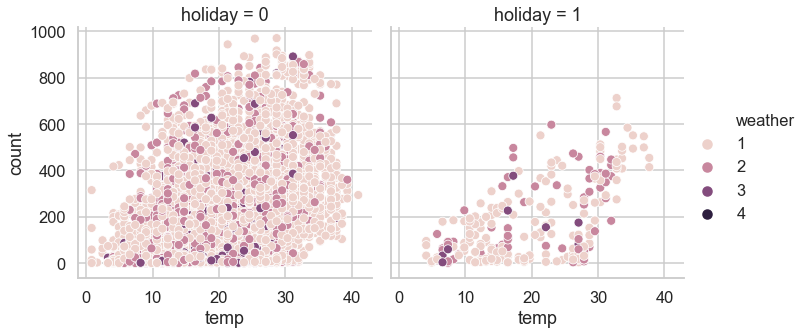

In [8]:
sns.relplot(x="temp", y="count", hue="weather", col="holiday", data=X_train)

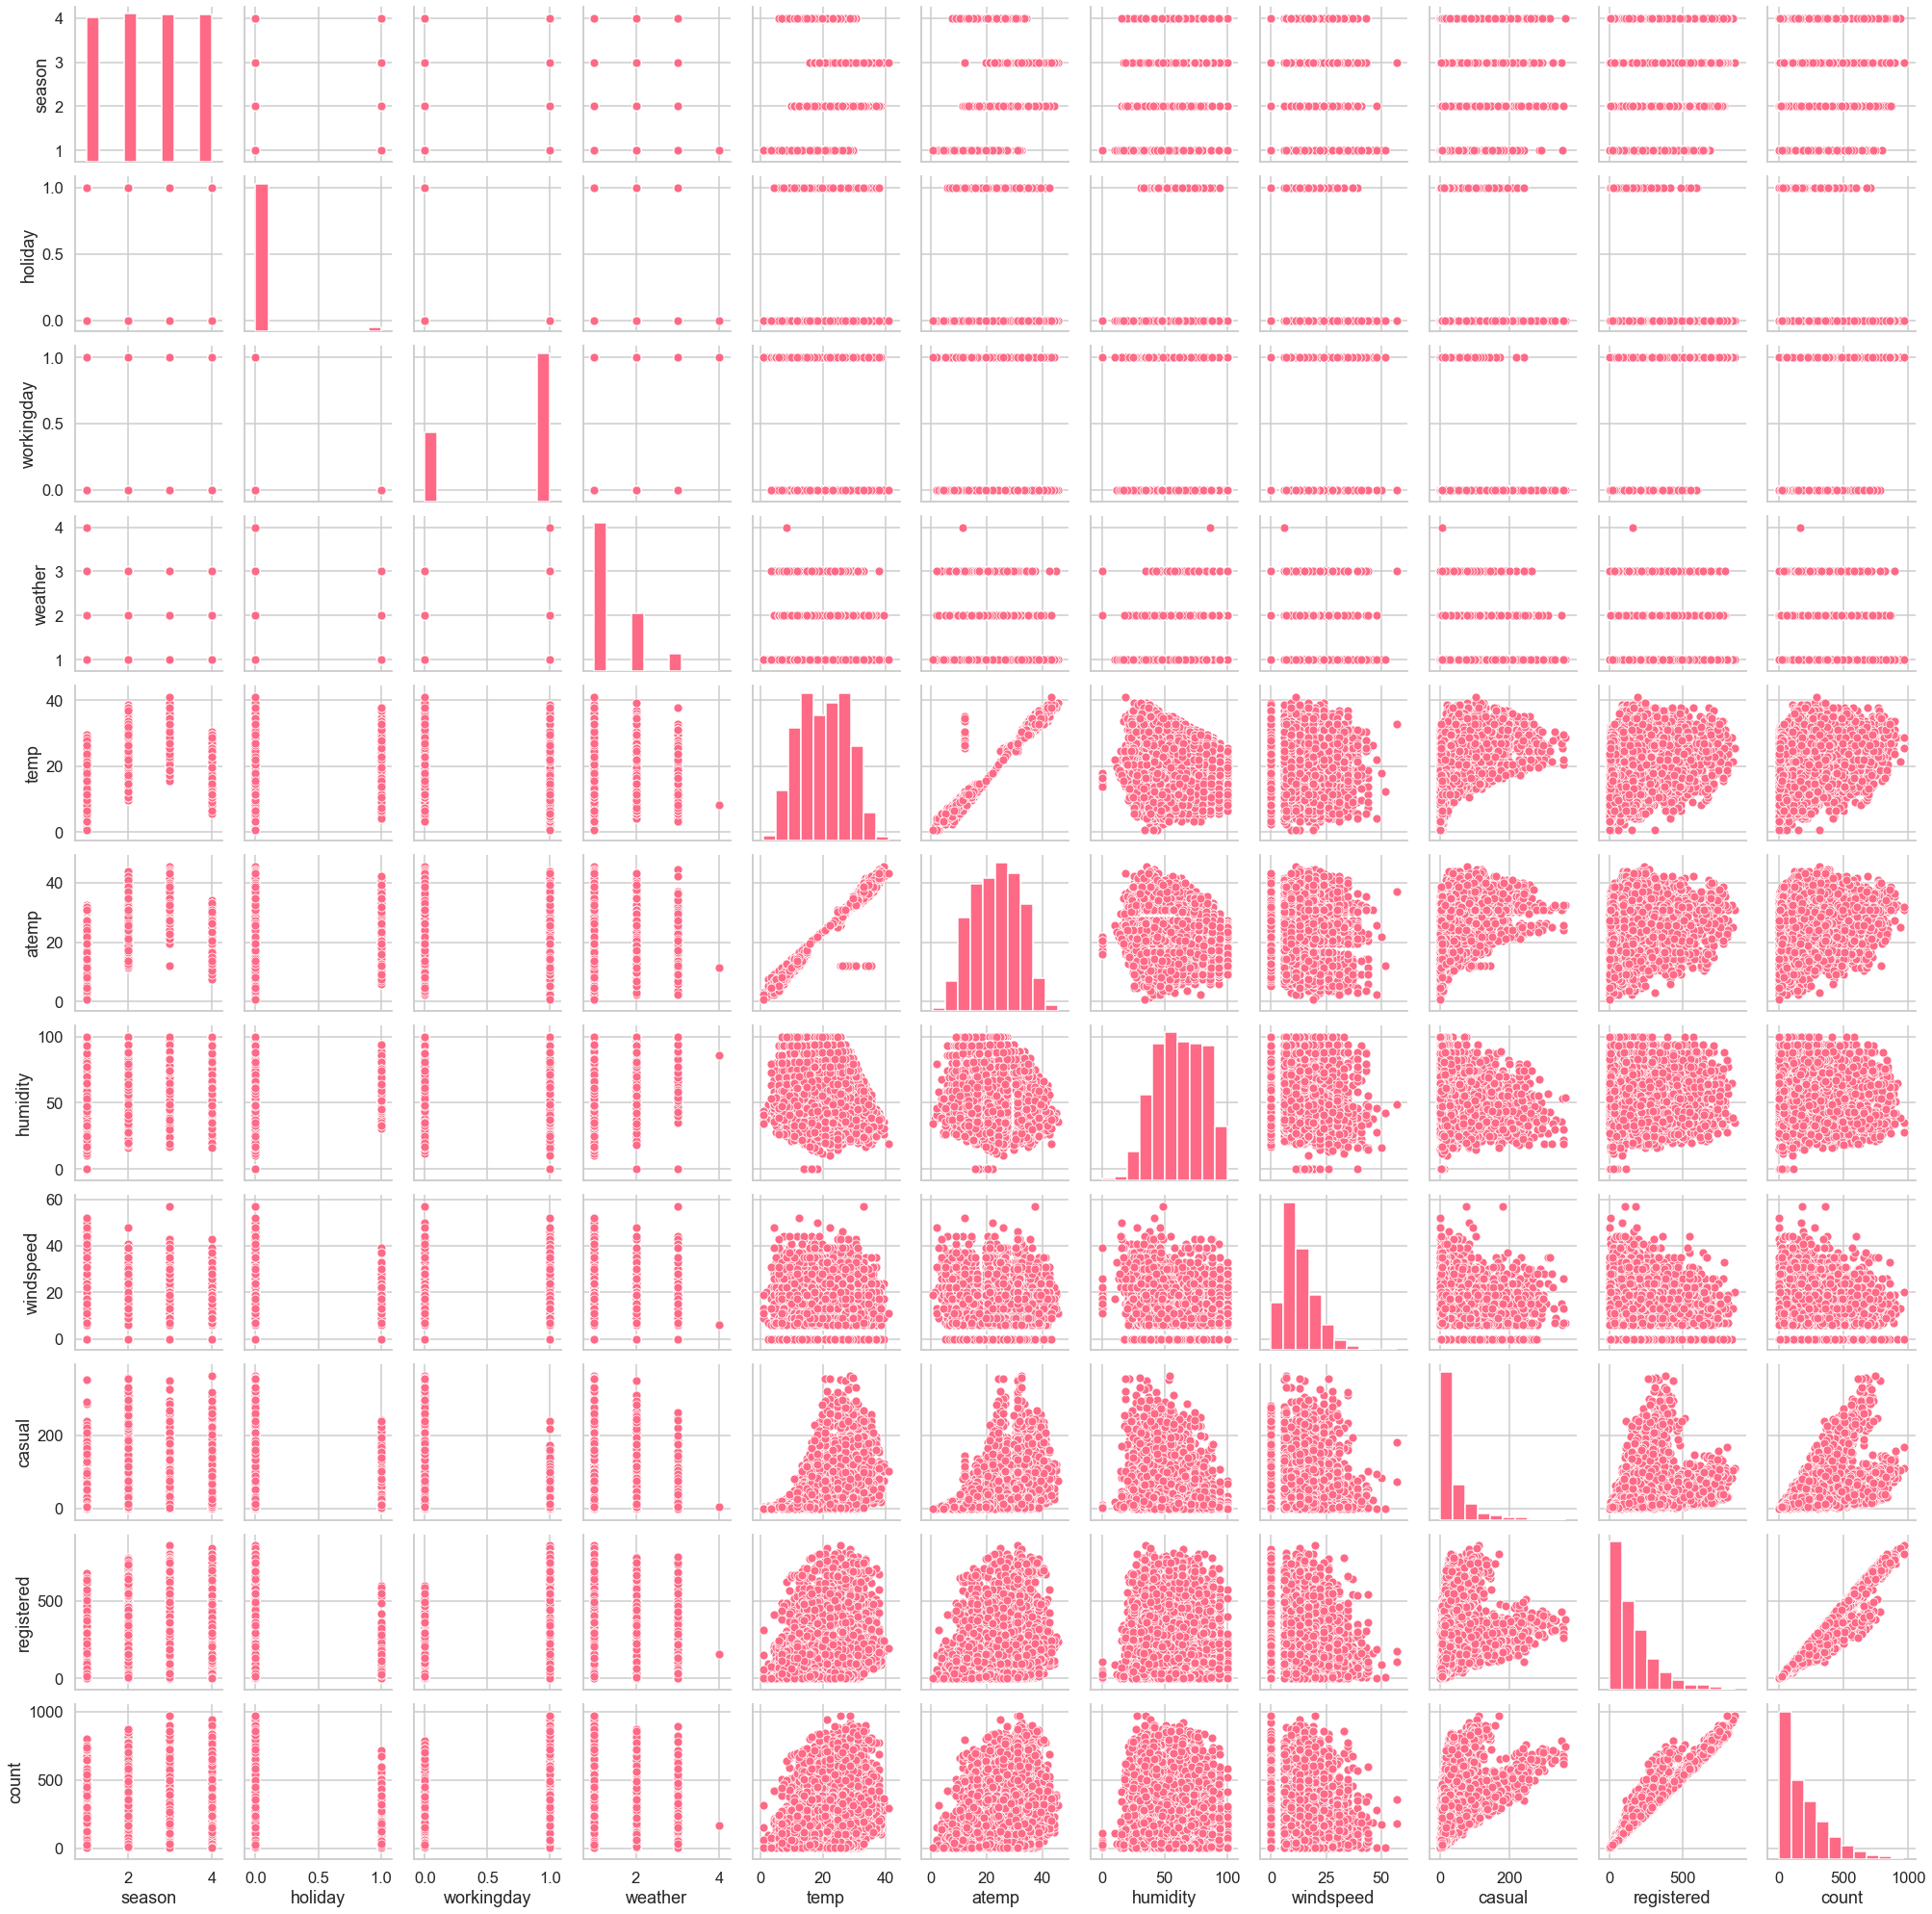

In [9]:
sns.pairplot(data=X_train)

## Feature Engineering

In [36]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_train[['datetime']]

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,datetime
2815,2011-07-06 05:00:00
8695,2012-08-04 16:00:00
8406,2012-07-11 15:00:00
1543,2011-04-10 04:00:00
4952,2011-11-19 10:00:00
...,...
5734,2012-01-14 02:00:00
5191,2011-12-10 09:00:00
5390,2011-12-18 16:00:00
860,2011-02-19 07:00:00


In [37]:
# Extract all time information
X_train['datetime_hour'] = X_train['datetime'].dt.hour # important _ onehot
X_train['datetime_day'] = X_train['datetime'].dt.day
X_train['datetime_month'] = X_train['datetime'].dt.month # use month as onehot or factorized instead of season
X_train['datetime_year'] = X_train['datetime'].dt.year # maybe instead of timestamp
X_train['datetime_weekdays'] = X_train['datetime'].dt.day_name()
X_train['timestamp'] = X_train['datetime'].astype(int) / 1_000_000_000_000_000_000 # use to account for increasing count over time

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

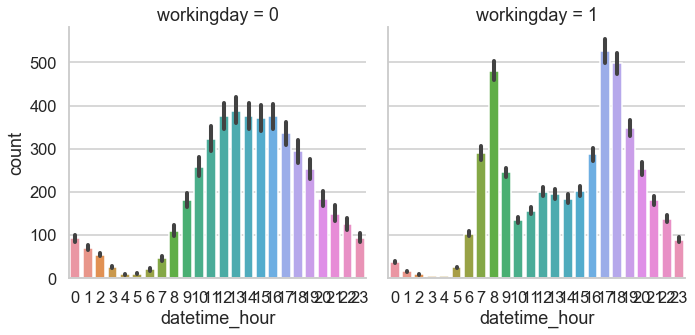

In [118]:
g = sns.catplot(x='datetime_hour', y='count', kind='bar', col = 'workingday', data=X_train)

#### One-hot encoding

In [102]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohc.fit(X_train[['datetime_month', 'weather', 'datetime_hour']])
onehot = ohc.transform(X_train[['datetime_month', 'weather', 'datetime_hour']])
onehot_columns = ohc.get_feature_names(['month', 'weather', 'hour'])

onehot = pd.DataFrame(onehot, columns=onehot_columns)

## Set up the model

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
X_train_model = X_train.reset_index()[['timestamp','workingday', 'temp', 'atemp', 'humidity', 'windspeed']]
X_train_model_onehot = pd.concat([X_train_model, onehot], axis=1)
onehot.shape, X_train_model.shape, X_train_model_onehot.shape

((8708, 40), (8708, 6), (8708, 46))

#### Scale the data

In [105]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() # scales each column to minimum 0.0 and maximum 1.0. Makes sure all data fits together.
#scaler.fit(X_train_model_onehot)
#X_scaled = scaler.transform(X_train_model_onehot) # later just use transform on X_test, DO NOT FIT AGAIN

In [106]:
lr = LinearRegression()
lr.fit(X_train_model_onehot, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
X_train_model_onehot.shape, y_train.shape

((8708, 46), (8708,))

In [108]:
lr.score(X_train_model_onehot, y_train)

0.6930389347548032

In [109]:
#for i in range(47):
#    print(type(X_train_model_onehot.iloc[0,i]))

In [110]:
X_train['count_pred'] = lr.predict(X_train_model_onehot)

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


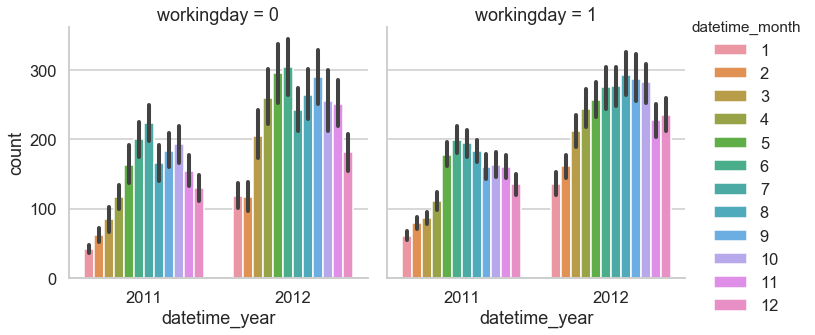

In [111]:
g = sns.catplot(x='datetime_year', y='count', kind='bar', hue = 'datetime_month', col = 'workingday', data=X_train)

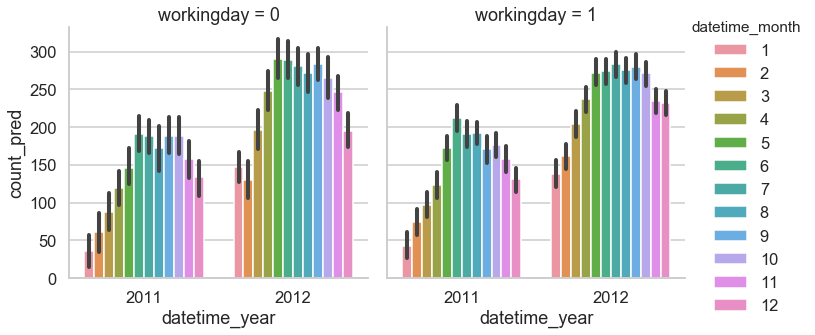

In [112]:
g = sns.catplot(x='datetime_year', y='count_pred', kind='bar', hue = 'datetime_month', col = 'workingday', data=X_train)

In [113]:
lr.coef_

array([ 2.71890379e+03,  3.17146219e+00,  2.32061382e+00,  2.24070498e+00,
       -8.06215644e-01, -5.83713370e-01, -3.03575948e+12, -3.03575948e+12,
       -3.03575948e+12, -3.03575948e+12, -3.03575948e+12, -3.03575948e+12,
       -3.03575948e+12, -3.03575948e+12, -3.03575948e+12, -3.03575948e+12,
       -3.03575948e+12, -3.03575948e+12,  3.03142311e+11,  3.03142311e+11,
        3.03142311e+11,  3.03142311e+11,  6.13246508e+10,  6.13246508e+10,
        6.13246508e+10,  6.13246508e+10,  6.13246508e+10,  6.13246508e+10,
        6.13246508e+10,  6.13246510e+10,  6.13246511e+10,  6.13246510e+10,
        6.13246509e+10,  6.13246509e+10,  6.13246510e+10,  6.13246510e+10,
        6.13246510e+10,  6.13246510e+10,  6.13246510e+10,  6.13246512e+10,
        6.13246512e+10,  6.13246511e+10,  6.13246510e+10,  6.13246509e+10,
        6.13246509e+10,  6.13246508e+10])